# Here are some questions that i have taken from kaggle for the retail shop analysis.
Special thanks to Darpan Bajaj

Let's see what report we can infer from the data set that i have taken from kaggle.

# Some core librarires required for the process.

In [63]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

# Importing the data set to jupyter notebook

In [64]:
Customer=pd.read_csv("C:/Users/PRIYA/Desktop/CASE STUDY/RETAIL CUSTOMER DAY TO DAY ANALYSIS/Customer.csv")
Prod_cat_info=pd.read_csv("C:/Users/PRIYA/Desktop/CASE STUDY/RETAIL CUSTOMER DAY TO DAY ANALYSIS/prod_cat_info.csv")
Transactions=pd.read_csv("C:/Users/PRIYA/Desktop/CASE STUDY/RETAIL CUSTOMER DAY TO DAY ANALYSIS/Transactions.csv")

# Let's see the EDA part.

In [65]:
Customer.shape

(5647, 4)

In [66]:
Prod_cat_info.shape

(23, 4)

In [67]:
Transactions.shape

(23053, 10)

In [68]:
Customer.head(2)

,customer_Id,DOB,Gender,city_code
0,268408,02-01-1970,M,4.0
1,269696,07-01-1970,F,8.0


In [69]:
Prod_cat_info.head(2)

,prod_cat_code,prod_cat,prod_sub_cat_code,prod_subcat
0,1,Clothing,4,Mens
1,1,Clothing,1,Women


In [70]:
Transactions.head(2)

,transaction_id,cust_id,tran_date,prod_subcat_code,prod_cat_code,Qty,Rate,Tax,total_amt,Store_type
0,80712190438,270351,28-02-2014,1,1,-5,-772,405.300,-4265.300,e-Shop
1,29258453508,270384,27-02-2014,5,3,-5,-1497,785.925,-8270.925,e-Shop


# 1)Merging all 3 variables into a single variable.

In [106]:
# renaming "prod_sub_cat_code" column in 'prod_info' table to make it similar to 'transaction' table
# to merge the both the tables easily
Prod_cat_info.rename(columns={"prod_sub_cat_code":"prod_subcat_code"},inplace=True)

In [107]:
Prod_cat_info.head(2)

,prod_cat_code,prod_cat,prod_subcat_code,prod_subcat
0,1,Clothing,4,Mens
1,1,Clothing,1,Women


In [108]:
#NOW MERGING THE DATASET.
# merge transaction and prod_info table and create a new table "prod_concat"
prod_concat = pd.merge(left=Transactions, right=Prod_cat_info,on=["prod_cat_code","prod_subcat_code"],how="left")


In [109]:
prod_concat.head(6)

,transaction_id,cust_id,tran_date,prod_subcat_code,prod_cat_code,Qty,Rate,Tax,total_amt,Store_type,prod_cat,prod_subcat
0,80712190438,270351,28-02-2014,1,1,-5,-772,405.300,-4265.300,e-Shop,Clothing,Women
1,29258453508,270384,27-02-2014,5,3,-5,-1497,785.925,-8270.925,e-Shop,Electronics,Computers
2,51750724947,273420,24-02-2014,6,5,-2,-791,166.110,-1748.110,TeleShop,Books,DIY
3,93274880719,271509,24-02-2014,11,6,-3,-1363,429.345,-4518.345,e-Shop,Home and kitchen,Bath
4,51750724947,273420,23-02-2014,6,5,-2,-791,166.110,-1748.110,TeleShop,Books,DIY
5,97439039119,272357,23-02-2014,8,3,-2,-824,173.040,-1821.040,TeleShop,Electronics,Personal Appliances


In [110]:
prod_concat.isnull().sum()

transaction_id      0
cust_id             0
tran_date           0
prod_subcat_code    0
prod_cat_code       0
Qty                 0
Rate                0
Tax                 0
total_amt           0
Store_type          0
prod_cat            0
prod_subcat         0
dtype: int64

In [111]:
#merge "prod_concat" and "customer" table and create the final table "customer_final"
customer_final = pd.merge(left=prod_concat, right=Customer,right_on="customer_Id", left_on="cust_id", how="left")

In [112]:
customer_final.head()

,transaction_id,cust_id,tran_date,prod_subcat_code,prod_cat_code,Qty,Rate,Tax,total_amt,Store_type,prod_cat,prod_subcat,customer_Id,DOB,Gender,city_code
0,80712190438,270351,28-02-2014,1,1,-5,-772,405.300,-4265.300,e-Shop,Clothing,Women,270351,26-09-1981,M,5.0
1,29258453508,270384,27-02-2014,5,3,-5,-1497,785.925,-8270.925,e-Shop,Electronics,Computers,270384,11-05-1973,F,8.0
2,51750724947,273420,24-02-2014,6,5,-2,-791,166.110,-1748.110,TeleShop,Books,DIY,273420,27-07-1992,M,8.0
3,93274880719,271509,24-02-2014,11,6,-3,-1363,429.345,-4518.345,e-Shop,Home and kitchen,Bath,271509,08-06-1981,M,3.0
4,51750724947,273420,23-02-2014,6,5,-2,-791,166.110,-1748.110,TeleShop,Books,DIY,273420,27-07-1992,M,8.0


In [113]:
customer_final.shape

(23053, 16)

In [114]:
Transactions.shape

(23053, 10)

In [115]:
print("Rows of both the variables are same.That means all the transactions are done at the retail store and retail store are present at the final table")

Rows of both the variables are same.That means all the transactions are done at the retail store and retail store are present at the final table


In [116]:
customer_final.dtypes

transaction_id        int64
cust_id               int64
tran_date            object
prod_subcat_code      int64
prod_cat_code         int64
Qty                   int64
Rate                  int64
Tax                 float64
total_amt           float64
Store_type           object
prod_cat             object
prod_subcat          object
customer_Id           int64
DOB                  object
Gender               object
city_code           float64
dtype: object

In [117]:
customer_final.isnull().sum()

transaction_id      0
cust_id             0
tran_date           0
prod_subcat_code    0
prod_cat_code       0
Qty                 0
Rate                0
Tax                 0
total_amt           0
Store_type          0
prod_cat            0
prod_subcat         0
customer_Id         0
DOB                 0
Gender              9
city_code           8
dtype: int64

We have missing values in gender and city_code

In [118]:
customer_final.loc[:,"city_code"].mean()

5.4825341722716425

Filling the values in the empty spaces.

In [119]:
customer_final['city_code']=customer_final['city_code'].fillna(5)

In [120]:
customer_final.isnull().sum()

transaction_id      0
cust_id             0
tran_date           0
prod_subcat_code    0
prod_cat_code       0
Qty                 0
Rate                0
Tax                 0
total_amt           0
Store_type          0
prod_cat            0
prod_subcat         0
customer_Id         0
DOB                 0
Gender              9
city_code           0
dtype: int64

In [121]:
customer_final.isnull()

,transaction_id,cust_id,tran_date,prod_subcat_code,prod_cat_code,Qty,Rate,Tax,total_amt,Store_type,prod_cat,prod_subcat,customer_Id,DOB,Gender,city_code
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23048,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
23049,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
23050,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
23051,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False


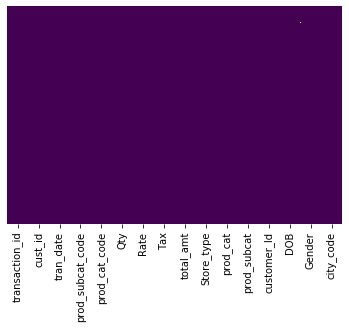

In [122]:
sns.heatmap(customer_final.isnull(),
           yticklabels=False,cbar=False,cmap='viridis')

In [123]:
customer_final=customer_final.dropna(axis=0,subset=['Gender'])

In [124]:
customer_final.isnull().sum()

transaction_id      0
cust_id             0
tran_date           0
prod_subcat_code    0
prod_cat_code       0
Qty                 0
Rate                0
Tax                 0
total_amt           0
Store_type          0
prod_cat            0
prod_subcat         0
customer_Id         0
DOB                 0
Gender              0
city_code           0
dtype: int64

# 2)Preparing a summary report for the merged data set

a) Getting the column names

In [125]:
customer_final.columns

Index(['transaction_id', 'cust_id', 'tran_date', 'prod_subcat_code',
       'prod_cat_code', 'Qty', 'Rate', 'Tax', 'total_amt', 'Store_type',
       'prod_cat', 'prod_subcat', 'customer_Id', 'DOB', 'Gender', 'city_code'],
      dtype='object')

In [126]:
customer_final.dtypes

transaction_id        int64
cust_id               int64
tran_date            object
prod_subcat_code      int64
prod_cat_code         int64
Qty                   int64
Rate                  int64
Tax                 float64
total_amt           float64
Store_type           object
prod_cat             object
prod_subcat          object
customer_Id           int64
DOB                  object
Gender               object
city_code           float64
dtype: object

b) Top/bottom observations

In [127]:
customer_final.head()

,transaction_id,cust_id,tran_date,prod_subcat_code,prod_cat_code,Qty,Rate,Tax,total_amt,Store_type,prod_cat,prod_subcat,customer_Id,DOB,Gender,city_code
0,80712190438,270351,28-02-2014,1,1,-5,-772,405.300,-4265.300,e-Shop,Clothing,Women,270351,26-09-1981,M,5.0
1,29258453508,270384,27-02-2014,5,3,-5,-1497,785.925,-8270.925,e-Shop,Electronics,Computers,270384,11-05-1973,F,8.0
2,51750724947,273420,24-02-2014,6,5,-2,-791,166.110,-1748.110,TeleShop,Books,DIY,273420,27-07-1992,M,8.0
3,93274880719,271509,24-02-2014,11,6,-3,-1363,429.345,-4518.345,e-Shop,Home and kitchen,Bath,271509,08-06-1981,M,3.0
4,51750724947,273420,23-02-2014,6,5,-2,-791,166.110,-1748.110,TeleShop,Books,DIY,273420,27-07-1992,M,8.0


In [128]:
customer_final.tail()

,transaction_id,cust_id,tran_date,prod_subcat_code,prod_cat_code,Qty,Rate,Tax,total_amt,Store_type,prod_cat,prod_subcat,customer_Id,DOB,Gender,city_code
23048,94340757522,274550,25-01-2011,12,5,1,1264,132.720,1396.720,e-Shop,Books,Academic,274550,21-02-1972,M,7.0
23049,89780862956,270022,25-01-2011,4,1,1,677,71.085,748.085,e-Shop,Clothing,Mens,270022,27-04-1984,M,9.0
23050,85115299378,271020,25-01-2011,2,6,4,1052,441.840,4649.840,MBR,Home and kitchen,Furnishing,271020,20-06-1976,M,8.0
23051,72870271171,270911,25-01-2011,11,5,3,1142,359.730,3785.730,TeleShop,Books,Children,270911,22-05-1970,M,2.0
23052,77960931771,271961,25-01-2011,11,5,1,447,46.935,493.935,TeleShop,Books,Children,271961,15-01-1982,M,1.0


(c) “Five-number summary” for continuous variables (min, Q1, median, Q3 and max)

In [129]:
customer_final.describe()

,transaction_id,cust_id,prod_subcat_code,prod_cat_code,Qty,Rate,Tax,total_amt,customer_Id,city_code
count,2.304400e+04,23044.000000,23044.000000,23044.000000,23044.000000,23044.000000,23044.000000,23044.000000,23044.000000,23044.000000
mean,5.007250e+10,271022.471055,6.149149,3.763756,2.432434,636.390601,248.665917,2107.235959,271022.471055,5.483032
std,2.898276e+10,2431.501796,3.726342,1.676863,2.268274,622.418707,187.184467,2507.663164,2431.501796,2.863108
min,3.268991e+06,266783.000000,1.000000,1.000000,-5.000000,-1499.000000,7.350000,-8270.925000,266783.000000,1.000000
25%,2.493815e+10,268936.000000,3.000000,2.000000,1.000000,312.000000,98.253750,762.450000,268936.000000,3.000000
50%,5.009018e+10,270980.000000,5.000000,4.000000,3.000000,710.000000,199.080000,1754.187500,270980.000000,5.000000
75%,7.532632e+10,273115.000000,10.000000,5.000000,4.000000,1109.000000,365.767500,3569.150000,273115.000000,8.000000
max,9.998755e+10,275265.000000,12.000000,6.000000,5.000000,1500.000000,787.500000,8287.500000,275265.000000,10.000000


(d) Frequency tables for all the categorical variables

In [130]:
customer_final.loc[:,customer_final.dtypes=="object"].describe()

,tran_date,Store_type,prod_cat,prod_subcat,DOB,Gender
count,23044,23044,23044,23044,23044,23044
unique,1129,4,6,18,3985,2
top,13-07-2011,e-Shop,Books,Women,27-12-1988,M
freq,35,9308,6065,3046,32,11811


Tran_date is also considered as a categorical which is not good.

In [131]:
# converting "DOB" and "tran_date" from object dtype to dates
customer_final["DOB"] = pd.to_datetime(customer_final["DOB"], format="%d-%m-%Y")
customer_final['DOB'].head(10)

0   1981-09-26
1   1973-05-11
2   1992-07-27
3   1981-06-08
4   1992-07-27
5   1982-10-09
6   1981-05-29
7   1971-04-21
8   1971-11-04
9   1979-11-27
Name: DOB, dtype: datetime64[ns]

In [132]:
customer_final["tran_date"] = pd.to_datetime(customer_final["tran_date"])
customer_final["tran_date"].head(10)

0   2014-02-28
1   2014-02-27
2   2014-02-24
3   2014-02-24
4   2014-02-23
5   2014-02-23
6   2014-02-22
7   2014-02-22
8   2014-02-22
9   2014-02-21
Name: tran_date, dtype: datetime64[ns]

Checking the duplicate values.

In [133]:
customer_final.duplicated().sum()

13

In [134]:
# dropping duplicate rows
customer_final.drop_duplicates(inplace=True)

In [135]:
customer_final.duplicated().sum()

0

In [136]:
customer_final.loc[:,customer_final.dtypes=="object"].describe()

,Store_type,prod_cat,prod_subcat,Gender
count,23031,23031,23031,23031
unique,4,6,18,2
top,e-Shop,Books,Women,M
freq,9301,6062,3044,11804


# 3)Generate histograms for all continuous variables and frequency bars for categorical variables

In [137]:
conti_customer = customer_final.loc[:,['prod_subcat_code','prod_cat_code', 'Qty', 'Rate', 'Tax', 'total_amt']]

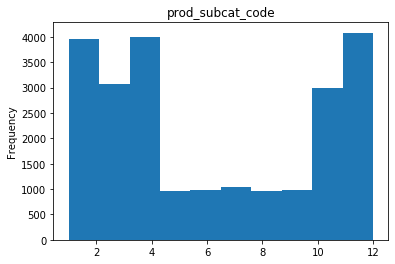

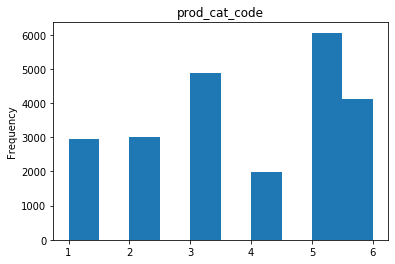

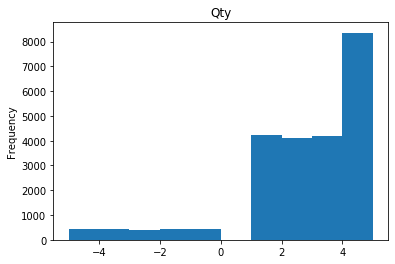

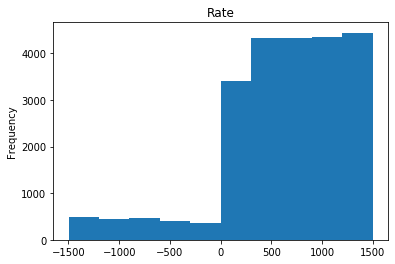

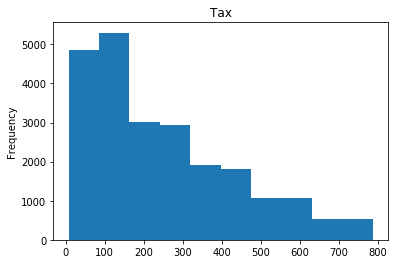

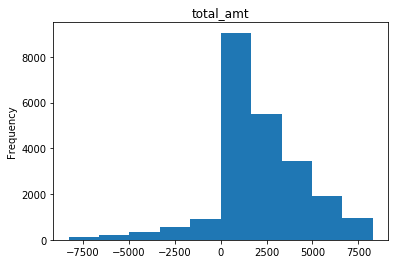

In [138]:
for var in conti_customer.columns:
    conti_customer[var].plot(kind='hist')
    plt.title(var)
    plt.show()

Bar chart for categorical data

In [139]:
category_customer = customer_final.loc[:,customer_final.dtypes=='object']

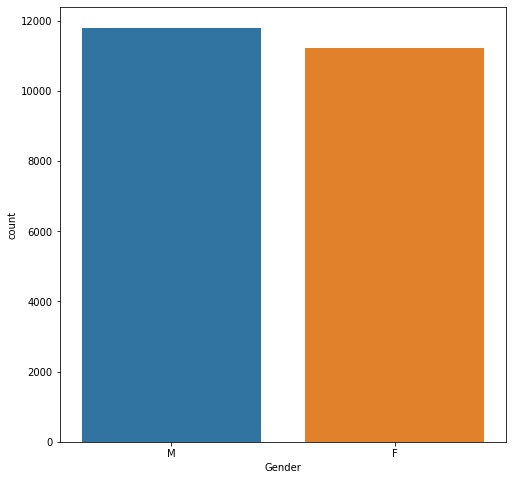

In [140]:
plt.figure(figsize=(8,8))
sns.countplot(category_customer['Gender'])
plt.show()

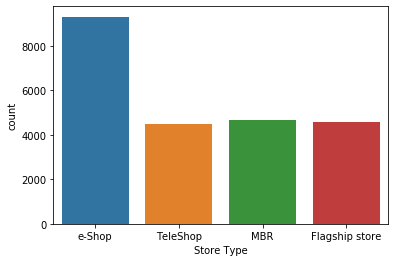

In [141]:
sns.countplot(category_customer['Store_type'])
plt.xlabel('Store Type')
plt.show()

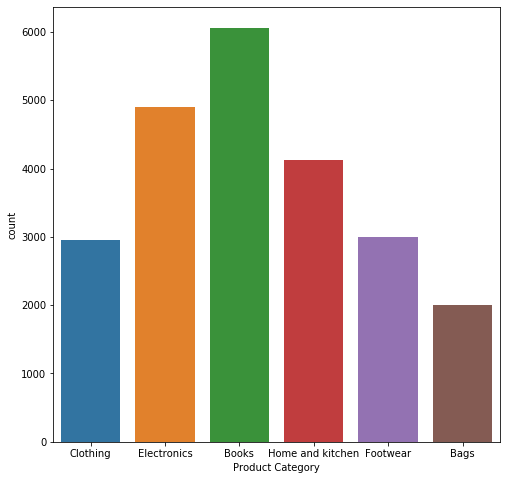

In [142]:
plt.figure(figsize=(8,8))
sns.countplot(category_customer['prod_cat'])
plt.xlabel('Product Category')
plt.show()

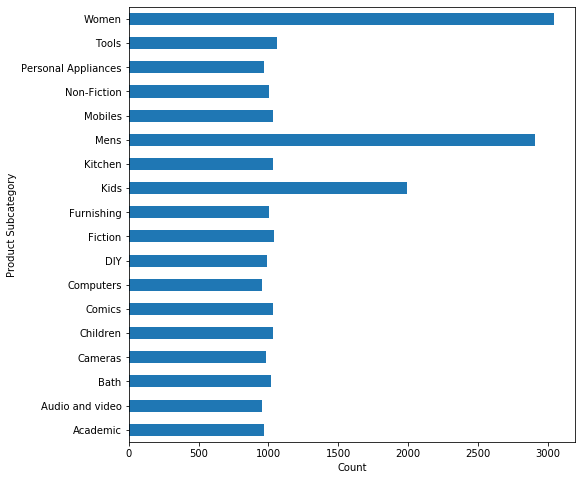

In [143]:
plt.figure(figsize=(8,8))
category_customer.groupby('prod_subcat')['prod_subcat'].count().plot(kind='barh')
plt.xlabel('Count')
plt.ylabel('Product Subcategory')
plt.show()

# 4) Calculate the following information using the merged dataset:

(a) Time period of the available transaction data

In [144]:
customer_final.sort_values(by="tran_date")

,transaction_id,cust_id,tran_date,prod_subcat_code,prod_cat_code,Qty,Rate,Tax,total_amt,Store_type,prod_cat,prod_subcat,customer_Id,DOB,Gender,city_code
22899,36332303449,268624,2011-01-02,10,6,-4,-295,123.900,-1303.900,Flagship store,Home and kitchen,Kitchen,268624,1986-09-18,F,1.0
22893,25374972356,268904,2011-01-02,2,6,5,821,431.025,4536.025,MBR,Home and kitchen,Furnishing,268904,1990-05-25,M,5.0
22894,15662366857,272756,2011-01-02,5,3,3,527,166.005,1747.005,e-Shop,Electronics,Computers,272756,1975-12-03,F,9.0
22895,28972634039,275227,2011-01-02,9,3,-1,-334,35.070,-369.070,MBR,Electronics,Cameras,275227,1989-09-23,M,4.0
22896,60041644943,267309,2011-01-02,3,2,1,392,41.160,433.160,Flagship store,Footwear,Women,267309,1973-04-08,F,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
161,65228973233,270009,2014-12-02,11,5,2,301,63.210,665.210,e-Shop,Books,Children,270009,1979-04-25,M,3.0
162,83661978186,274678,2014-12-02,10,3,2,325,68.250,718.250,e-Shop,Electronics,Audio and video,274678,1975-05-20,F,9.0
146,17146707816,274897,2014-12-02,12,5,3,622,195.930,2061.930,MBR,Books,Academic,274897,1987-09-16,M,2.0
154,74023090711,271180,2014-12-02,8,3,3,271,85.365,898.365,Flagship store,Electronics,Personal Appliances,271180,1987-11-08,M,4.0


In [145]:
min_date = customer_final["tran_date"].min()
max_date = customer_final["tran_date"].max()

In [146]:
print("Time period of the available transaction data is from "+ pd.Timestamp.strftime(min_date,format="%d-%m-%Y") + " to " + pd.Timestamp.strftime(max_date,format="%d-%m-%Y"))

Time period of the available transaction data is from 02-01-2011 to 02-12-2014


(b) Count of transactions where the total amount of transaction was negative

In [147]:
#count of transaction_ids where total_amt was negative
negative_transaction = customer_final.loc[customer_final["total_amt"] < 0,"transaction_id"].count()

In [148]:
print("Count of transactions where the total amount of transaction was negative is",negative_transaction)

Count of transactions where the total amount of transaction was negative is 2163


# 5) Analyze which product categories are more popular among females vs male customers

In [149]:
#groupby the data set on the basis of "Gender" and "prod_cat"
product_gender = customer_final.groupby(["Gender","prod_cat"])[["Qty"]].sum().reset_index()

In [150]:
product_gender

,Gender,prod_cat,Qty
0,F,Bags,2364
1,F,Books,7080
2,F,Clothing,3425
3,F,Electronics,5832
4,F,Footwear,3721
5,F,Home and kitchen,4898
6,M,Bags,2346
7,M,Books,7587
8,M,Clothing,3748
9,M,Electronics,6486


In [151]:
#converting to pivot table for better view
product_gender.pivot(index="Gender",columns="prod_cat",values="Qty")

prod_cat,Bags,Books,Clothing,Electronics,Footwear,Home and kitchen
Gender,,,,,,
F,2364,7080,3425,5832,3721,4898
M,2346,7587,3748,6486,3561,5051


# 6) Which City code has the maximum customers and what was the percentage of customers from that city?

In [152]:
customer_group = customer_final.groupby('city_code')['customer_Id'].count().sort_values(ascending =False)

In [153]:
customer_group

city_code
4.0     2422
3.0     2410
5.0     2365
7.0     2356
10.0    2333
8.0     2328
2.0     2263
1.0     2255
9.0     2176
6.0     2123
Name: customer_Id, dtype: int64

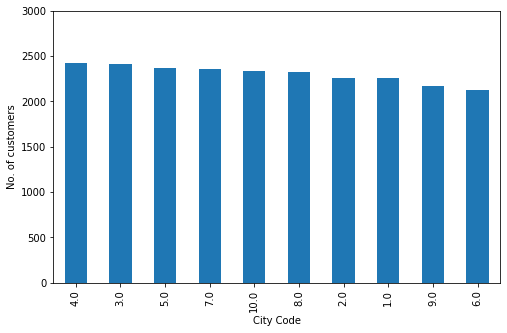

In [154]:
plt.figure(figsize=(8,5))
customer_group.plot(kind="bar")
plt.xlabel("City Code")
plt.ylabel("No. of customers")
plt.yticks(np.arange(0, 3500, step=500))
plt.show()

In [155]:
percentage = round((customer_group[4.0] / customer_group.sum()) * 100,2)
percentage

10.52

# 7) Which store type sells the maximum products by value and by quantity?

In [156]:
customer_final.head(2)

,transaction_id,cust_id,tran_date,prod_subcat_code,prod_cat_code,Qty,Rate,Tax,total_amt,Store_type,prod_cat,prod_subcat,customer_Id,DOB,Gender,city_code
0,80712190438,270351,2014-02-28,1,1,-5,-772,405.300,-4265.300,e-Shop,Clothing,Women,270351,1981-09-26,M,5.0
1,29258453508,270384,2014-02-27,5,3,-5,-1497,785.925,-8270.925,e-Shop,Electronics,Computers,270384,1973-05-11,F,8.0


In [157]:
customer_final.groupby("Store_type")["Qty","Rate"].sum().sort_values(by="Qty",ascending=False)

C:\Users\PRIYA\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  """Entry point for launching an IPython kernel.


,Qty,Rate
Store_type,,
e-Shop,22789,5945526
MBR,11188,2951847
Flagship store,11142,2942874
TeleShop,10980,2833175


# 8) What was the total amount earned from the "Electronics" and "Clothing" categories from Flagship Stores?

In [158]:
store_group = round(customer_final.pivot_table(index = "prod_cat",columns="Store_type", values="total_amt", aggfunc='sum'),2)
store_group

Store_type,Flagship store,MBR,TeleShop,e-Shop
prod_cat,,,,
Bags,870548.83,848678.68,789181.06,1617933.27
Books,2493677.81,2491402.62,2538591.64,5296891.53
Clothing,1194423.23,1287686.34,1241527.17,2527193.57
Electronics,2215136.04,2107969.82,1978457.19,4429142.77
Footwear,1234806.56,1109614.48,1235719.29,2643215.25
Home and kitchen,1713004.15,1822403.57,1575486.90,3327977.12


In [159]:
store_group.loc[["Clothing","Electronics"],"Flagship store"]

prod_cat
Clothing       1194423.23
Electronics    2215136.04
Name: Flagship store, dtype: float64

In [160]:
# if we have to find total amount of both 'Clothing' and 'Electronics' from ' Flagship Store'
store_group.loc[["Clothing","Electronics"],"Flagship store"].sum()

3409559.27

# 9) What was the total amount earned from "Male" customers under the "Electronics" category?

In [161]:
gender_group = round(customer_final.pivot_table(index = "prod_cat",columns="Gender", values="total_amt", aggfunc='sum'),2)

In [162]:
gender_group

Gender,F,M
prod_cat,,
Bags,2079618.84,2046722.99
Books,6174590.82,6645972.77
Clothing,3026750.80,3224079.50
Electronics,5019354.21,5711351.62
Footwear,3203155.21,3020200.37
Home and kitchen,4133702.23,4305169.51


In [163]:
male_earning = gender_group.loc["Electronics","M"]
print("The total amount earned from Male customers under the Electronics category is",male_earning)

The total amount earned from Male customers under the Electronics category is 5711351.62


# 10) How many customers have more than 10 unique transactions, after removing all transactions which have any negative amounts?

In [164]:
#creating a new dataframe that does not contain transactions with negative values
pos_trans = customer_final.loc[customer_final["total_amt"]>0,:]
pos_trans

,transaction_id,cust_id,tran_date,prod_subcat_code,prod_cat_code,Qty,Rate,Tax,total_amt,Store_type,prod_cat,prod_subcat,customer_Id,DOB,Gender,city_code
10,29258453508,270384,2014-02-20,5,3,5,1497,785.925,8270.925,e-Shop,Electronics,Computers,270384,1973-05-11,F,8.0
11,25455265351,267750,2014-02-20,12,6,3,1360,428.400,4508.400,e-Shop,Home and kitchen,Tools,267750,1986-10-13,M,1.0
12,1571002198,275023,2014-02-20,6,5,4,587,246.540,2594.540,e-Shop,Books,DIY,275023,1971-03-09,M,6.0
14,36554696014,269345,2014-02-20,3,5,3,1253,394.695,4153.695,e-Shop,Books,Comics,269345,1970-06-26,F,10.0
15,56814940239,268799,2014-02-20,7,5,5,368,193.200,2033.200,e-Shop,Books,Fiction,268799,1979-06-27,M,9.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23048,94340757522,274550,2011-01-25,12,5,1,1264,132.720,1396.720,e-Shop,Books,Academic,274550,1972-02-21,M,7.0
23049,89780862956,270022,2011-01-25,4,1,1,677,71.085,748.085,e-Shop,Clothing,Mens,270022,1984-04-27,M,9.0
23050,85115299378,271020,2011-01-25,2,6,4,1052,441.840,4649.840,MBR,Home and kitchen,Furnishing,271020,1976-06-20,M,8.0
23051,72870271171,270911,2011-01-25,11,5,3,1142,359.730,3785.730,TeleShop,Books,Children,270911,1970-05-22,M,2.0


In [165]:
# creating a dataframe that contains unique transactions 
unique_trans = pos_trans.groupby(['customer_Id','prod_cat','prod_subcat'])['transaction_id'].count().reset_index()
unique_trans

,customer_Id,prod_cat,prod_subcat,transaction_id
0,266783,Books,Non-Fiction,1
1,266783,Clothing,Mens,2
2,266783,Footwear,Mens,1
3,266784,Books,Fiction,1
4,266784,Books,Non-Fiction,1
...,...,...,...,...
19265,275264,Books,Non-Fiction,1
19266,275264,Home and kitchen,Tools,1
19267,275265,Bags,Mens,1
19268,275265,Books,Academic,1


In [166]:
# now finding the customers which have unique transactions greater than 10
unique_trans_count = unique_trans.groupby('customer_Id')['transaction_id'].count().reset_index()
unique_trans_count.head()

,customer_Id,transaction_id
0,266783,3
1,266784,3
2,266785,5
3,266788,4
4,266794,8


In [167]:
unique_trans_count[unique_trans_count['transaction_id'] > 10]

,customer_Id,transaction_id


In [168]:
print('There are no unique transactions greater than 10')

There are no unique transactions greater than 10


# 11) For all customers aged between 25-35, find out:

(a) What was the total amount spent for 'Electronics' and 'Books' product categories?


Adding new column 'age

In [169]:
now = pd.Timestamp('now')
customer_final['DOB'] = pd.to_datetime(customer_final['DOB'], format='%m%d%y')    # 1
customer_final['DOB'] = customer_final['DOB'].where(customer_final['DOB'] < now, customer_final['DOB'] -  np.timedelta64(100, 'Y'))   # 2
customer_final['AGE'] = (now - customer_final['DOB']).astype('<m8[Y]')
customer_final.head()

,transaction_id,cust_id,tran_date,prod_subcat_code,prod_cat_code,Qty,Rate,Tax,total_amt,Store_type,prod_cat,prod_subcat,customer_Id,DOB,Gender,city_code,AGE
0,80712190438,270351,2014-02-28,1,1,-5,-772,405.300,-4265.300,e-Shop,Clothing,Women,270351,1981-09-26,M,5.0,38.0
1,29258453508,270384,2014-02-27,5,3,-5,-1497,785.925,-8270.925,e-Shop,Electronics,Computers,270384,1973-05-11,F,8.0,47.0
2,51750724947,273420,2014-02-24,6,5,-2,-791,166.110,-1748.110,TeleShop,Books,DIY,273420,1992-07-27,M,8.0,27.0
3,93274880719,271509,2014-02-24,11,6,-3,-1363,429.345,-4518.345,e-Shop,Home and kitchen,Bath,271509,1981-06-08,M,3.0,38.0
4,51750724947,273420,2014-02-23,6,5,-2,-791,166.110,-1748.110,TeleShop,Books,DIY,273420,1992-07-27,M,8.0,27.0


as we have to deal with customers aged between 25-35, so creating new column 'Age_cat'

In [170]:
customer_final['Age_cat'] = pd.cut(customer_final['AGE'],bins=[24,35,46,57],labels=['25-35','36-46','47-57'],include_lowest=True)

In [171]:
customer_final.head()

,transaction_id,cust_id,tran_date,prod_subcat_code,prod_cat_code,Qty,Rate,Tax,total_amt,Store_type,prod_cat,prod_subcat,customer_Id,DOB,Gender,city_code,AGE,Age_cat
0,80712190438,270351,2014-02-28,1,1,-5,-772,405.300,-4265.300,e-Shop,Clothing,Women,270351,1981-09-26,M,5.0,38.0,36-46
1,29258453508,270384,2014-02-27,5,3,-5,-1497,785.925,-8270.925,e-Shop,Electronics,Computers,270384,1973-05-11,F,8.0,47.0,47-57
2,51750724947,273420,2014-02-24,6,5,-2,-791,166.110,-1748.110,TeleShop,Books,DIY,273420,1992-07-27,M,8.0,27.0,25-35
3,93274880719,271509,2014-02-24,11,6,-3,-1363,429.345,-4518.345,e-Shop,Home and kitchen,Bath,271509,1981-06-08,M,3.0,38.0,36-46
4,51750724947,273420,2014-02-23,6,5,-2,-791,166.110,-1748.110,TeleShop,Books,DIY,273420,1992-07-27,M,8.0,27.0,25-35


In [172]:
# grouping the dataframe 'customer_final' on the basis of 'Age_cat' and 'prod_cat'
customer_25_35 = customer_final.groupby(['Age_cat','prod_cat'])['total_amt'].sum()
customer_25_35

Age_cat  prod_cat        
25-35    Bags                1500595.525
         Books               4656703.155
         Clothing            2554263.855
         Electronics         4163359.330
         Footwear            2335987.680
         Home and kitchen    3190820.100
36-46    Bags                2015655.915
         Books               6291702.040
         Clothing            2926254.370
         Electronics         4964624.665
         Footwear            2946205.145
         Home and kitchen    4107517.050
47-57    Bags                 610090.390
         Books               1872158.405
         Clothing             770312.075
         Electronics         1602721.835
         Footwear             941162.755
         Home and kitchen    1140534.590
Name: total_amt, dtype: float64

In [173]:
customer_25_35.loc['25-35',['Books','Electronics']]

Age_cat  prod_cat   
25-35    Books          4656703.155
         Electronics    4163359.330
Name: total_amt, dtype: float64

In [174]:
print("Total amount spent on 'Electronics' and 'Books' product categories is", 
      customer_25_35.loc['25-35',['Books','Electronics']].sum().round(2))

Total amount spent on 'Electronics' and 'Books' product categories is 8820062.48


(b) What was the total amount spent by these customers between 1st Jan 2014 to 1st Mar 2014?

In [175]:
customer_final.head()

,transaction_id,cust_id,tran_date,prod_subcat_code,prod_cat_code,Qty,Rate,Tax,total_amt,Store_type,prod_cat,prod_subcat,customer_Id,DOB,Gender,city_code,AGE,Age_cat
0,80712190438,270351,2014-02-28,1,1,-5,-772,405.300,-4265.300,e-Shop,Clothing,Women,270351,1981-09-26,M,5.0,38.0,36-46
1,29258453508,270384,2014-02-27,5,3,-5,-1497,785.925,-8270.925,e-Shop,Electronics,Computers,270384,1973-05-11,F,8.0,47.0,47-57
2,51750724947,273420,2014-02-24,6,5,-2,-791,166.110,-1748.110,TeleShop,Books,DIY,273420,1992-07-27,M,8.0,27.0,25-35
3,93274880719,271509,2014-02-24,11,6,-3,-1363,429.345,-4518.345,e-Shop,Home and kitchen,Bath,271509,1981-06-08,M,3.0,38.0,36-46
4,51750724947,273420,2014-02-23,6,5,-2,-791,166.110,-1748.110,TeleShop,Books,DIY,273420,1992-07-27,M,8.0,27.0,25-35


In [176]:
# filtering out data that belongs to the 'age_cat' = 25-35
customer_total_amount_25_35 = customer_final[customer_final['Age_cat']=='25-35']
customer_total_amount_25_35.head()

,transaction_id,cust_id,tran_date,prod_subcat_code,prod_cat_code,Qty,Rate,Tax,total_amt,Store_type,prod_cat,prod_subcat,customer_Id,DOB,Gender,city_code,AGE,Age_cat
2,51750724947,273420,2014-02-24,6,5,-2,-791,166.110,-1748.110,TeleShop,Books,DIY,273420,1992-07-27,M,8.0,27.0,25-35
4,51750724947,273420,2014-02-23,6,5,-2,-791,166.110,-1748.110,TeleShop,Books,DIY,273420,1992-07-27,M,8.0,27.0,25-35
11,25455265351,267750,2014-02-20,12,6,3,1360,428.400,4508.400,e-Shop,Home and kitchen,Tools,267750,1986-10-13,M,1.0,33.0,25-35
13,43134751727,268487,2014-02-20,3,2,-1,-611,64.155,-675.155,e-Shop,Footwear,Women,268487,1984-06-10,F,2.0,35.0,25-35
17,25963520987,274829,2014-02-20,4,4,3,502,158.130,1664.130,Flagship store,Bags,Women,274829,1984-09-05,F,2.0,35.0,25-35


In [177]:
# getting all the data with transaction date between 1st Jan 2014 to 1st Mar 2014?
total_amount = customer_total_amount_25_35[(customer_total_amount_25_35['tran_date'] >='2014-01-01') & (customer_total_amount_25_35['tran_date'] <='2014-03-01')]
total_amount

,transaction_id,cust_id,tran_date,prod_subcat_code,prod_cat_code,Qty,Rate,Tax,total_amt,Store_type,prod_cat,prod_subcat,customer_Id,DOB,Gender,city_code,AGE,Age_cat
2,51750724947,273420,2014-02-24,6,5,-2,-791,166.110,-1748.110,TeleShop,Books,DIY,273420,1992-07-27,M,8.0,27.0,25-35
4,51750724947,273420,2014-02-23,6,5,-2,-791,166.110,-1748.110,TeleShop,Books,DIY,273420,1992-07-27,M,8.0,27.0,25-35
11,25455265351,267750,2014-02-20,12,6,3,1360,428.400,4508.400,e-Shop,Home and kitchen,Tools,267750,1986-10-13,M,1.0,33.0,25-35
13,43134751727,268487,2014-02-20,3,2,-1,-611,64.155,-675.155,e-Shop,Footwear,Women,268487,1984-06-10,F,2.0,35.0,25-35
17,25963520987,274829,2014-02-20,4,4,3,502,158.130,1664.130,Flagship store,Bags,Women,274829,1984-09-05,F,2.0,35.0,25-35
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1051,32889219128,269536,2014-01-01,10,5,5,1423,747.075,7862.075,e-Shop,Books,Non-Fiction,269536,1990-03-21,M,5.0,30.0,25-35
1054,42711619809,271701,2014-01-01,1,2,5,336,176.400,1856.400,MBR,Footwear,Mens,271701,1991-07-11,M,7.0,28.0,25-35
1059,67088172893,271877,2014-01-01,1,1,1,902,94.710,996.710,e-Shop,Clothing,Women,271877,1992-03-28,F,6.0,28.0,25-35
1061,63635040022,268886,2014-01-01,3,2,5,652,342.300,3602.300,e-Shop,Footwear,Women,268886,1992-08-03,M,1.0,27.0,25-35


In [178]:
print('The total amount spent by customers aged 25-35 between 1st Jan 2014 to 1st Mar 2014 is',
      total_amount['total_amt'].sum())

The total amount spent by customers aged 25-35 between 1st Jan 2014 to 1st Mar 2014 is 587972.71
